In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn
import math

# CLASSIFICATION

## A Glimpse of the Datasets

In [57]:
df= pd.read_csv('campus.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Categorical:**
- **Nominal**
   > - **hsc_s**(Commerce, Science, Others)     
   > - **degree_t**(Sci&Tech, Comm&Mgmt, Arts)

- **Dichotomous**
   > - **gender**(F(Female), M(Male))        
   > - **ssc_b**(Others, Central)     
   > - **hsc_b**(Others, Central)
   > - **workex**(No, Yes)
   > - **specialisation**(Mkt&HR, Mkt&Fin)
   > - **status**(Placed, Not Placed)
           
***
**Numeric:**
- **Discrete**
  >  - **sl_no**
- **Continous**
>  - **ssc_p**
>  - **hsc_p**
>  - **degree_p**
>  - **etest_p**
>  - **mba_p**
>  - **salary**
***

## Missing/Null Values

In [3]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Our data is relatively clean with a few missing values under salary. Let's have a closer look at it

In [4]:
df[df.isna().any(axis=1)].head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN


In [5]:
df[df.isna().any(axis=1)]['status'].unique()

array(['Not Placed'], dtype=object)

It's evident that the missing values are infact not avaialable bacause candidates who aren't placed cannot have a "salary" amount offered to them

## Exploratory Data Analysis(EDA)

In [6]:
x= df[df['status'] == 'Placed']
y= df[df['status'] == 'Not Placed']

### Does the percentage or score of a candidate throughout the course have an impact if a job is offered to them?

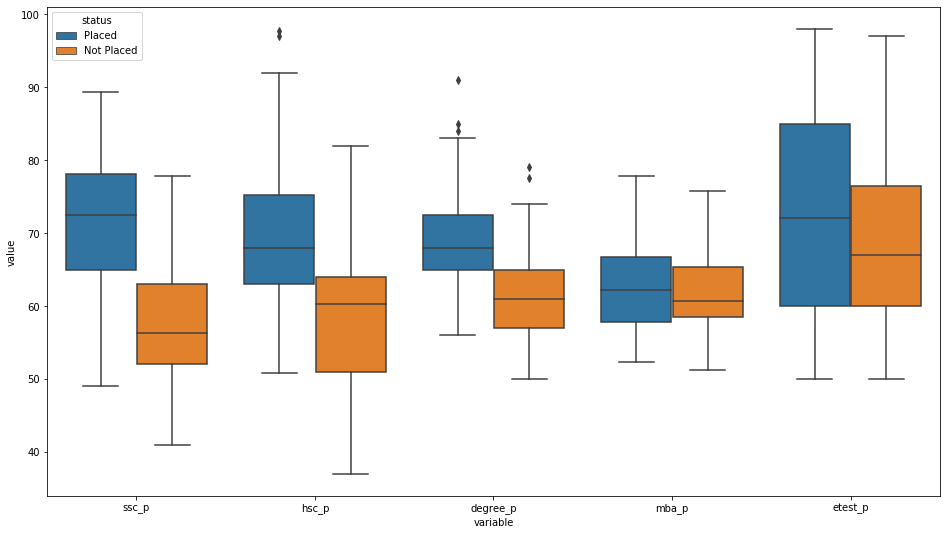

In [7]:
y = pd.melt(df ,id_vars = "status", value_vars = ['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p'])
plt.figure(figsize = (16, 9))
sns.boxplot(x = "variable", y = "value", hue="status", data= y)
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

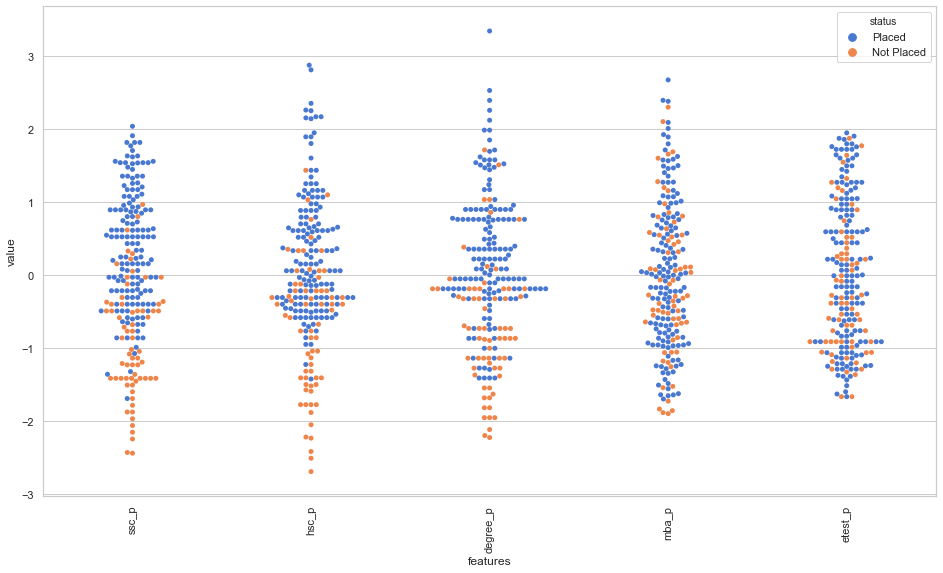

In [8]:
sns.set(style="whitegrid", palette="muted")
data_dia = df['status']
data = df[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']]
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([df['status'],data_n_2],axis=1)
data = pd.melt(data,id_vars="status",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(16,9))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="status", data=data)

plt.xticks(rotation=90)

It can quite be quite clearly be noticed hat the percentage scored in ssc_p, hsc_p and degree_p have an impact if a candidate is placed or not. The higher the percentage, better is the charge of being placed. Percentage scored during MBA and the etest_p does not have a major signifiance on the chances of getting placed

In [9]:
x= df[df['status'] == 'Placed']
y= df[df['status'] == 'Not Placed']

### How do the categorical calues stack up in terms of the chances of getting placed?

[Text(0.5, 1.0, "('Not Placed', 1.39)")]

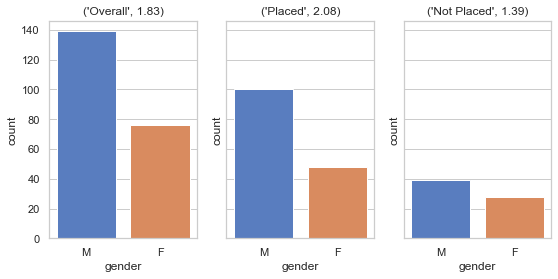

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9,4), ncols=3, sharey=True)
sns.countplot(df['gender'], label="Count", ax=ax1).set(title = ("Overall" , round(df[df['gender']== 'M'].shape[0] / df[df['gender']== 'F'].shape[0],2)))
sns.countplot(x['gender'], label="Count", ax=ax2).set(title = ("Placed" , round(x[x['gender']== 'M'].shape[0] / x[x['gender']== 'F'].shape[0],2)))
sns.countplot(y['gender'], label="Count", ax=ax3).set(title = ("Not Placed" , round(y[y['gender']== 'M'].shape[0] / y[y['gender']== 'F'].shape[0],2)))

- There are more male candidates than female candidates(Ratio: 1.8)
- The ratio is almost the same, but it could be said that higher ratio of male to female candidates were placed than male to female candidates who wer note placed
- We shall consider these feature in our model

[Text(0.5, 1.0, "('Not Placed', 0.76)")]

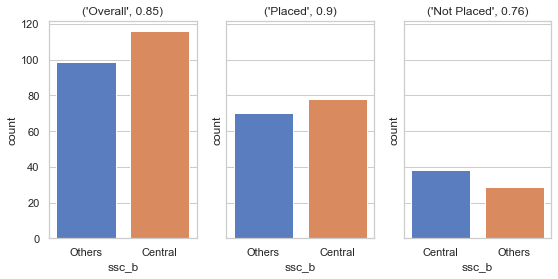

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9,4), ncols=3, sharey=True)
sns.countplot(df['ssc_b'], label="Count", ax=ax1).set(title = ("Overall" , round(df[df['ssc_b']== 'Others'].shape[0] / df[df['ssc_b']== 'Central'].shape[0],2)))
sns.countplot(x['ssc_b'], label="Count", ax=ax2).set(title = ("Placed" , round(x[x['ssc_b']== 'Others'].shape[0] / x[x['ssc_b']== 'Central'].shape[0],2)))
sns.countplot(y['ssc_b'], label="Count", ax=ax3).set(title = ("Not Placed" , round(y[y['ssc_b']== 'Others'].shape[0] / y[y['ssc_b']== 'Central'].shape[0],2)))

[Text(0.5, 1.0, "('Not Placed', 1.48)")]

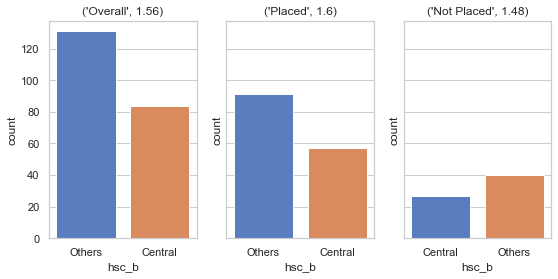

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9,4), ncols=3, sharey=True)
sns.countplot(df['hsc_b'], label="Count", ax=ax1).set(title = ("Overall" , round(df[df['hsc_b']== 'Others'].shape[0] / df[df['hsc_b']== 'Central'].shape[0],2)))
sns.countplot(x['hsc_b'], label="Count", ax=ax2).set(title = ("Placed" , round(x[x['hsc_b']== 'Others'].shape[0] / x[x['hsc_b']== 'Central'].shape[0],2)))
sns.countplot(y['hsc_b'], label="Count", ax=ax3).set(title = ("Not Placed" , round(y[y['hsc_b']== 'Others'].shape[0] / y[y['hsc_b']== 'Central'].shape[0],2)))

- The ratio for candidates in central to other boards for SSC and HSC is almost the same as a whole, and within the criteria of being placed or not placed
- We shall not consider these 2 feature in our model

[Text(0.5, 1.0, "('Not Placed', 0.18)")]

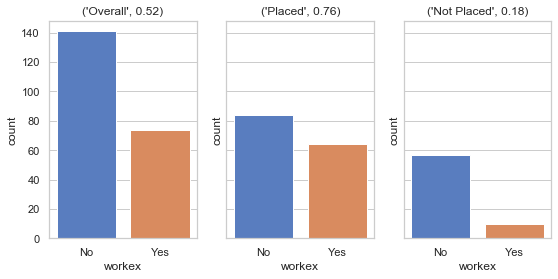

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9,4), ncols=3, sharey=True)
sns.countplot(df['workex'], label="Count", ax=ax1).set(title = ("Overall" , round(df[df['workex']== 'Yes'].shape[0] / df[df['workex']== 'No'].shape[0],2)))
sns.countplot(x['workex'], label="Count", ax=ax2).set(title = ("Placed" , round(x[x['workex']== 'Yes'].shape[0] / x[x['workex']== 'No'].shape[0],2)))
sns.countplot(y['workex'], label="Count", ax=ax3).set(title = ("Not Placed" , round(y[y['workex']== 'Yes'].shape[0] / y[y['workex']== 'No'].shape[0],2)))

<b>This is an intresting insight!</b><br>
A candidates work experience did not matter much when it comes to the candidate getting placed. It can be seen that higher number of candidates who did not have a job experience were placed otherwise.
But... One cannot turn heads when you notice that significantly fewer candidates with workex have been unplaced

[Text(0.5, 1.0, "('Not Placed', 1.68)")]

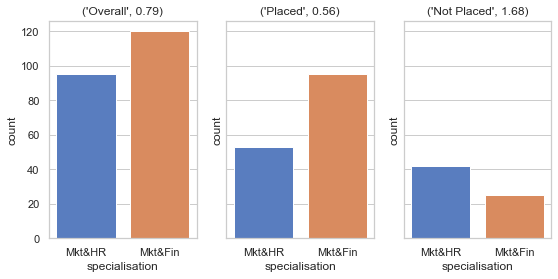

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9,4), ncols=3, sharey=True)
sns.countplot(df['specialisation'], label="Count", ax=ax1).set(title = ("Overall" , round(df[df['specialisation']== 'Mkt&HR'].shape[0] / df[df['specialisation']== 'Mkt&Fin'].shape[0],2)))
sns.countplot(x['specialisation'], label="Count", ax=ax2).set(title = ("Placed" , round(x[x['specialisation']== 'Mkt&HR'].shape[0] / x[x['specialisation']== 'Mkt&Fin'].shape[0],2)))
sns.countplot(y['specialisation'], label="Count", ax=ax3).set(title = ("Not Placed" , round(y[y['specialisation']== 'Mkt&HR'].shape[0] / y[y['specialisation']== 'Mkt&Fin'].shape[0],2)))

- A lot of candidates who are from the Mkt&Fin background have got placed and fewer Mkt&Fin have been not placed. This is an important feature
(However it could be noted that the reason Mkt&Fin candidtes were selected more because there could be more openings in that particular field)

## Preprocesing

### Scaling Data

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']] = sc.fit_transform(df[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']])

### Encoding

In [59]:
df= pd.get_dummies(df, columns=['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation'])

### Dropping features

Dropping the SSC and HSC board attributes as they do not add a lot of significance

In [60]:
df.drop(columns={'ssc_b', 'hsc_b'},axis=1, inplace= True)

Droppping the Serial No and Salary column

In [61]:
df.drop(columns={'sl_no', 'salary'},axis=1, inplace= True)

## Modelling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [63]:
train, test = train_test_split(df, test_size=0.2)

In [64]:
reg=LogisticRegression(solver= 'lbfgs')
scores = cross_val_score(reg, df.drop(columns={'status'},axis=1), df['status'], cv=5)
scores.mean()

0.8653780328198935

In [65]:
rfc= RandomForestClassifier(n_estimators= 100)
scores = cross_val_score(rfc, df.drop(columns={'status'},axis=1), df['status'], cv=5)
scores.mean()

0.850986610288936

In [66]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_LR = {'C': [10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3],
                 'class_weight':['balanced', None],
                 'max_iter':[100,200,300,400, 500, 1000] }

random_search_LR= RandomizedSearchCV(reg, param_distributions=param_grid_LR
                                    ,n_iter=10,scoring='roc_auc',n_jobs=-1, cv=5 , verbose=3)

In [67]:
scores= cross_val_score(random_search_LR, df.drop(columns={'status'},axis=1), df['status'], cv=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 out of  50 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 out of  50 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 out of  50 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
print(scores.mean()*100, '%')

93.56587091069851 %


# REGRESSION

In [26]:
df= pd.read_csv('campus.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [27]:
x= df[df['status'] == 'Placed']

In [28]:
dfJunction= x[['specialisation', 'salary']].groupby(['specialisation']).median().reset_index()
dfYear= x[['degree_t', 'salary']].groupby(['degree_t']).median().reset_index()

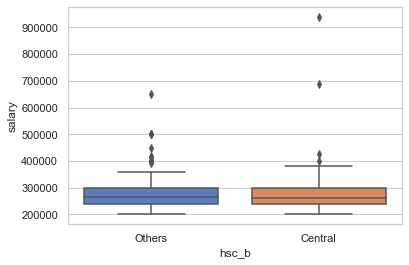

In [29]:
sns.boxplot(x='hsc_b', y='salary', data=x)

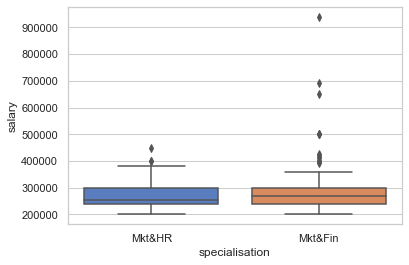

In [30]:
sns.boxplot(x='specialisation', y='salary', data=x)

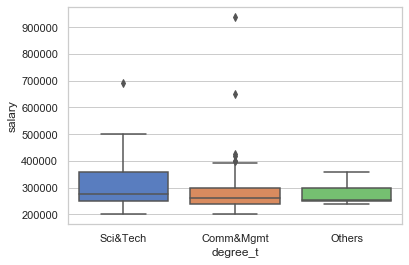

In [31]:
sns.boxplot(x='degree_t', y='salary', data=x)

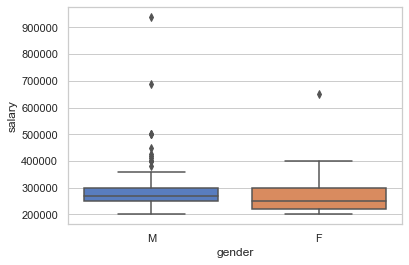

In [32]:
sns.boxplot(x='gender', y='salary', data=x)

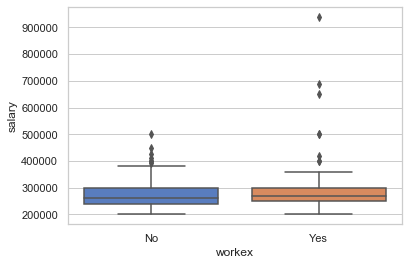

In [33]:
sns.boxplot(x='workex', y='salary', data=x)

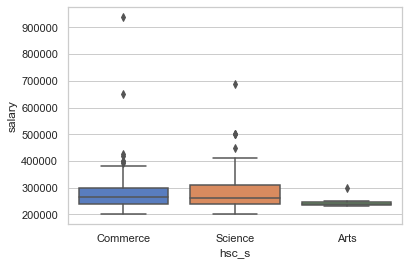

In [34]:
sns.boxplot(x='hsc_s', y='salary', data=x)

# Processing

In [35]:
x.drop(['sl_no'], axis=1, inplace=True)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']] = sc.fit_transform(x[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']])

In [37]:
x= pd.get_dummies(x, columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation'])

In [38]:
x.drop(['status'], axis=1, inplace=True)

# Modelling

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
random_state = 2
regressors = []
reg1= LinearRegression()
reg2= SVR()
reg3= SGDRegressor(random_state=2)
reg4= Lasso(random_state=2)
reg5= Ridge(random_state=2)
reg6= DecisionTreeRegressor(random_state=2)
reg7= RandomForestRegressor(random_state=2)
regressors.append(reg1)
regressors.append(reg2)
regressors.append(reg3)
regressors.append(reg4)
regressors.append(reg5)
regressors.append(reg6)
regressors.append(reg7)

In [41]:
cv_results = []
for regressor in regressors :
    cv_results.append(cross_val_score(regressor, x.drop(columns={'salary'},axis=1), x['salary'], scoring= 'neg_mean_squared_error', cv = 3))

In [42]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean() * -1)
    cv_std.append(cv_result.std())

In [43]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LinearRegression","SVR","SGDClassifier",
"Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor"]})

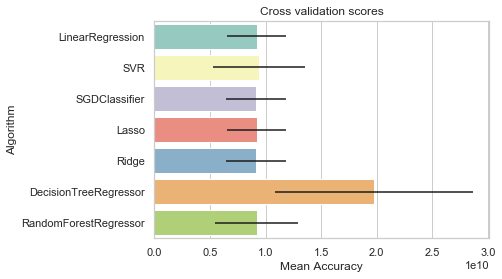

In [44]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [45]:
from sklearn.ensemble import VotingRegressor

In [46]:
meanMeans= (cv_means[0] + cv_means[1] + cv_means[3] + cv_means[4] + cv_means[6])/5
meanStd= (cv_std[0] + cv_std[1] + cv_std[3] + cv_std[4] + cv_std[5])/5

In [47]:
votingC = VotingRegressor(estimators=[('rfc', reg1), ('extc', reg2),
('svc', reg4), ('adac',reg5),('gbc',reg7)], n_jobs=5)

In [48]:
scores = cross_val_score(votingC, x.drop(columns={'salary'},axis=1), x['salary'], scoring= 'neg_mean_squared_error', cv = 5)
scores= scores.mean()

In [49]:
cv_means = []
cv_std = []
cv_means.append(meanMeans)
cv_std.append(meanStd)
cv_means.append(scores.mean() * -1)
cv_std.append(scores.std())

In [50]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Mean", 'VotingRegressor']})

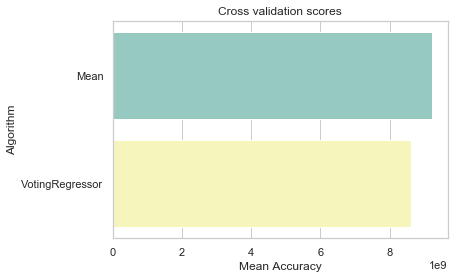

In [51]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")